In [ ]:
# This code will find the pitch and formant of filler word from audio from AWS transcript only.
# Note: It is  not trying to find filler sounds using audio analysis.
#Inputs: audio files with .wav formate
#Output: pitch, formant
#Files this notebook refers: Docs inside '/content/drive/My Drive/Paleru_Khushi/Filler_words_audios/Person_um1.wav'
#Author: Khushi Pitroda
#Date: 9-July-2021

In [ ]:
#Prerequisite
#.Wav (audio) files with high and low volumes
#parselmouth
#timestamp - start and end point of filler word 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Change directory 
#Go to shared with me folder create shortcut of shared folder and add it to the my drive so you can access that shared folder from here.

import os 
os.chdir("/content/drive/MyDrive/Paleru_Khushi")    


In [ ]:
import json         #for reading json files

In [ ]:
pip install praat-parselmouth

     |████████████████████████████████| 10.7 MB 14.6 MB/s 


In [ ]:
import parselmouth
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


=================Audio: 1=================

Word: um, start_time: 20.29, end_time: 20.83,Total_time: 0.5399999999999991

=================Audio: 2=================

Word: um, start_time: 12.21, end_time: 12.63,Total_time: 0.41999999999999993

Word: uh, start_time: 23.48, end_time: 23.95,Total_time: 0.46999999999999886

Word: uh, start_time: 27.33, end_time: 27.66,Total_time: 0.33000000000000185

=================Audio: 3=================

Word: uh, start_time: 2.94, end_time: 4.15,Total_time: 1.2100000000000004

Word: uh, start_time: 19.65, end_time: 20.22,Total_time: 0.5700000000000003

Word: uh, start_time: 24.23, end_time: 24.75,Total_time: 0.5199999999999996

=================Audio: 4=================

Word: um, start_time: 6.94, end_time: 7.56,Total_time: 0.6199999999999992

Word: um, start_time: 24.24, end_time: 24.59,Total_time: 0.3500000000000014

=================Audio: 5=================

Word: uh, start_time: 7.79, end_time: 8.86,Total_time: 1.0699999999999994

Word: uh, st

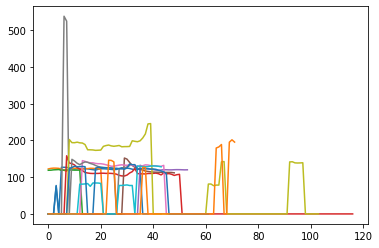

In [ ]:
from operator import itemgetter           #for mapping
pitch_all = []
for i in range(1,6):
  f = open("/content/drive/MyDrive/Paleru_Khushi/JSON/asrOutput"+str(i)+".json")           #create json file by uploading audio files (https://aws.amazon.com/getting-started/hands-on/create-audio-transcript-transcribe/)

  data = json.load(f)
                              #dictonary containing all information 
  x = data['results'] ['items']         #fetch result(keyname) from data and from result(sub-dictonary) fetch transcripts stores in list named x  
  #print(x)
  print(f"\n=================Audio: {i}=================")
  for j in range(1,len(x)):             #for getting each single word, start_time and start_time from the list
    start_time = 0                      #initial value
    end_time = 0                        #initial value
    word = x[j]['alternatives'][0]['content']         #get the word- content from dictonary inside the list inside the dicrtonary named alternatives which is inside the list x. print(x) for more understanding.
    if word!='.' and word!=',' and (word=="um" or word=="uh"):                       #punctuation doesn't have timestamps so ignoring it and only finding filler words
      start_time = x[j]['start_time']                 #from list getting value of start_time for each word- content
      end_time = x[j]['end_time']                     #from list getting value of end_time for each word- content
      total_time = float(end_time) - float(start_time)
      print(f"\nWord: {word}, start_time: {start_time}, end_time: {end_time},Total_time: {total_time}")        #printing all the values
      #print(f"from_time={start_time}\nto_time={end_time}")
      snd = parselmouth.Sound('/content/drive/My Drive/Paleru_Khushi/Filler_words_audios/Person_um'+str(i)+'.wav')  #loading the file
      snd_part = snd.extract_part(from_time=float(start_time),to_time=float(end_time), preserve_times=True)                          #extract part of audio where filler word occures

      pitch = snd_part.to_pitch()                 #finding pitch of that filler word
      # Extract selected pitch contour, and
      # replace unvoiced samples by NaN to not plot
      pitch_values = pitch.selected_array['frequency']
      pitch_all.append(pitch_values)
      
      
            
for i in range(1,len(pitch_all)):
  plt.plot(pitch_all[i])
